In [16]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
#loading the datset
df = pd.read_csv('/content/diabetes_data_upload.csv')

In [7]:
#display the first 5 rows of the dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
#display statistical summary
df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [10]:
#checking for duplicates
df.nunique()

,0
Age,51
Gender,2
Polyuria,2
Polydipsia,2
sudden weight loss,2
weakness,2
Polyphagia,2
Genital thrush,2
visual blurring,2
Itching,2


In [11]:
#checking for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


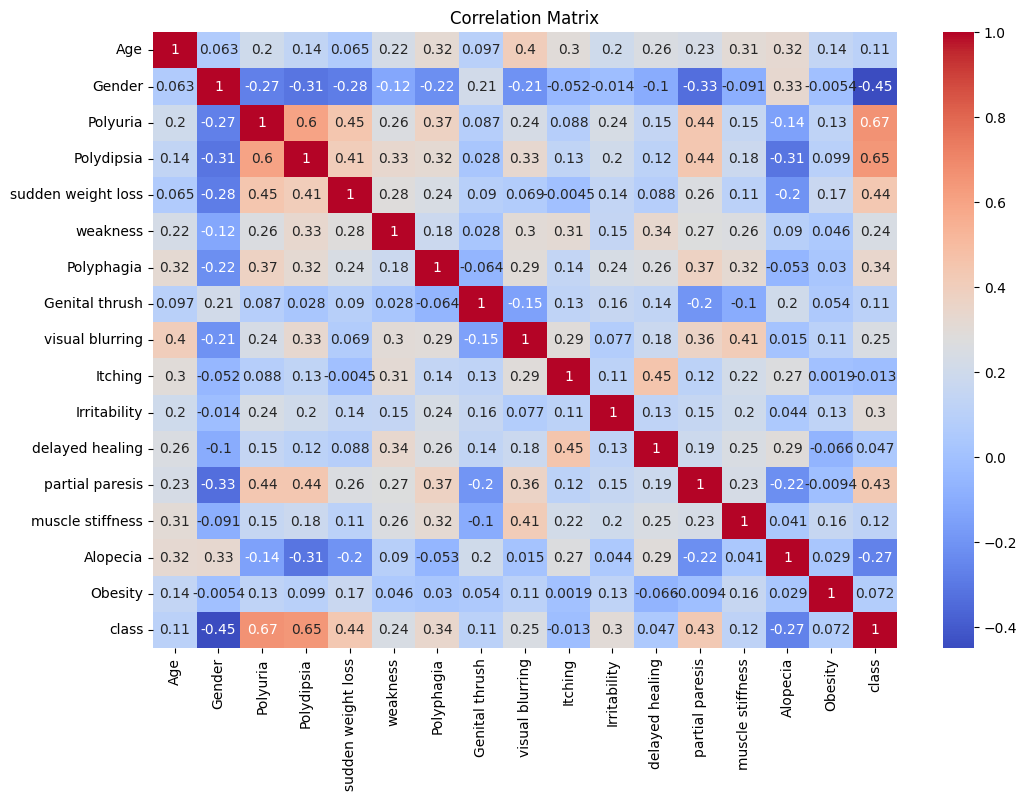

In [17]:
# Creating a copy of the dataframe to avoid changing the original data
df_encoded = df.copy()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Initializing the LabelEncoder
le = LabelEncoder()

# Encoding the categorical columns
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Computing the correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
#decision trees
from sklearn.tree import DecisionTreeClassifier

#mlp classifier
from sklearn.neural_network import MLPClassifier

#xgboost
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report

In [22]:
# Encoding in the main data frame
# List of categorical columns to encode
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                       'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Initializing the LabelEncoder
le = LabelEncoder()

# Encoding the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Defining features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Define models in a dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),

    'MLP Classifier': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=1000,
        activation='relu',
        solver='adam',
        random_state=42
    ),

    'XGBoost': XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    )
}

# Dictionary to store results
predictions = {}
probabilities = {}
accuracies = {}
auc_roc_scores = {}
classification_reports = {}

# Train models and get predictions
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions[name] = model.predict(X_test)

    # Get prediction probabilities
    probabilities[name] = model.predict_proba(X_test)[:, 1]

    # Calculate accuracy
    accuracies[name] = accuracy_score(y_test, predictions[name])

    # Calculate AUC-ROC score
    auc_roc_scores[name] = roc_auc_score(y_test, probabilities[name])

    # Get classification report
    classification_reports[name] = classification_report(y_test, predictions[name])

# Print results
for name in models.keys():
    print(f"\n{name} Results:")
    print("-" * 50)
    print(f"Accuracy: {accuracies[name]:.4f}")
    print(f"AUC-ROC Score: {auc_roc_scores[name]:.4f}")
    print("\nClassification Report:")
    print(classification_reports[name])


Decision Tree Results:
--------------------------------------------------
Accuracy: 0.9744
AUC-ROC Score: 0.9717

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156


MLP Classifier Results:
--------------------------------------------------
Accuracy: 0.9872
AUC-ROC Score: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99       102

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156


XGBoost Results:
--------------------------------------------------


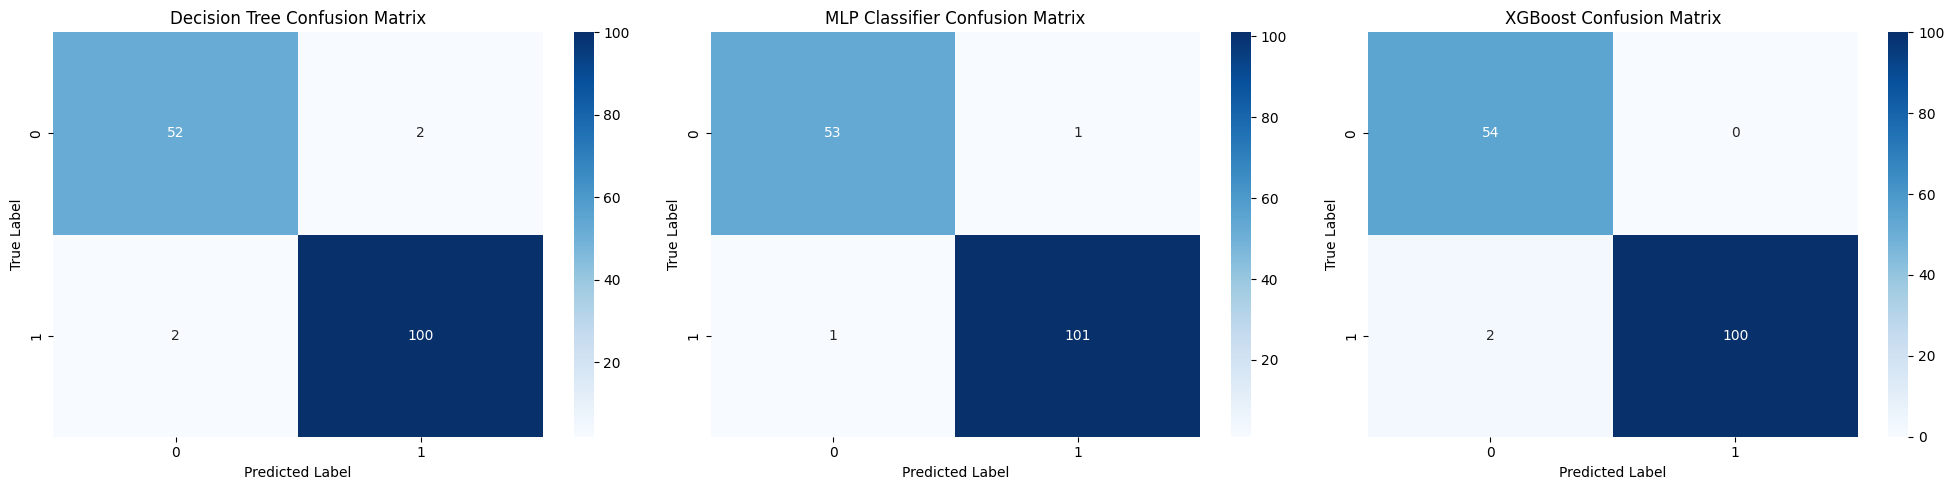


Decision Tree Confusion Matrix:
[[ 52   2]
 [  2 100]]

MLP Classifier Confusion Matrix:
[[ 53   1]
 [  1 101]]

XGBoost Confusion Matrix:
[[ 54   0]
 [  2 100]]


In [26]:
# Create figure with subplots for each model's confusion matrix
plt.figure(figsize=(20,5))

# Dictionary to store confusion matrices
confusion_matrices = {}

# Create and plot confusion matrices for each model
for idx, (name, pred) in enumerate(predictions.items(), 1):
    # Calculate confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, pred)

    # Create subplot
    plt.subplot(1, 3, idx)
    sns.heatmap(confusion_matrices[name], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Print confusion matrices values
for name, cm in confusion_matrices.items():
    print(f"\n{name} Confusion Matrix:")
    print(cm)

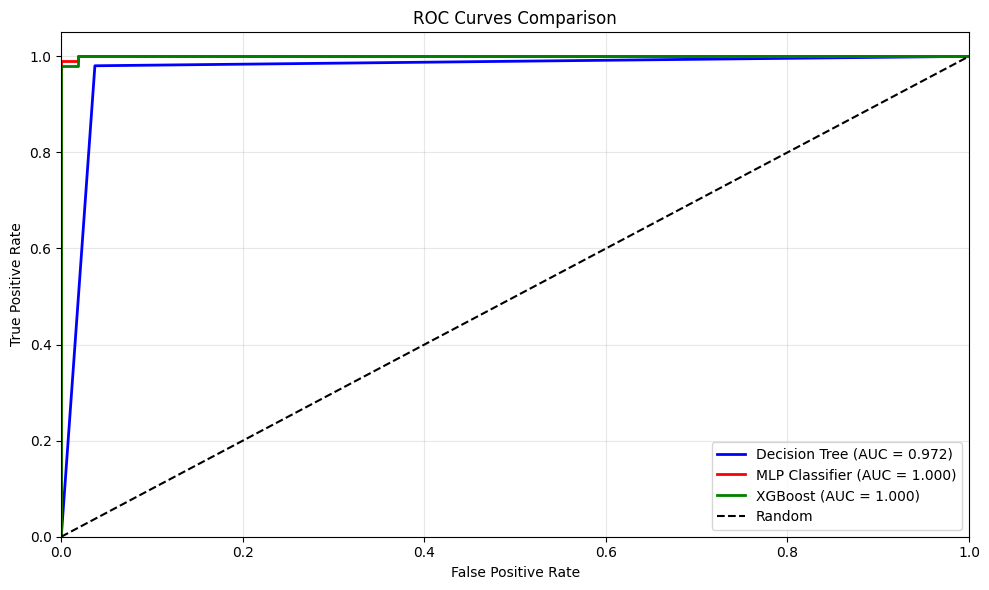

In [28]:
# Create ROC Curve plot
plt.figure(figsize=(10, 6))

# Colors for different models
colors = {
    'Decision Tree': 'blue',
    'MLP Classifier': 'red',
    'XGBoost': 'green'
}

# Plot ROC curve for each model
for name, proba in probabilities.items():
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)

    # Plot ROC curve
    plt.plot(fpr, tpr,
             label=f'{name} (AUC = {auc_roc_scores[name]:.3f})',
             color=colors[name],
             linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Set plot limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()